# NetworkX


## Installing NetworkX


If you are running this notebook online (in Google Colaboratory, for example), you can install NetworkX by running the following command:


In [104]:
# !pip install networkx

In [105]:
import matplotlib.pyplot as plt
import networkx as nx

## 4. Centrality


Centrality is a measure of the importance of nodes in a network based on their position and connectivity. There are different types of centrality measures, each capturing a different aspect of node importance.

Some common centrality measures include degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality.


### A) Degree Centrality-undirected graphs


Degree centrality is a measure of the importance of a node in a network based on the number of connections it has to other nodes. The degree centrality of a node $i$ can be calculated as:

$$C_D(i) = \frac{k_i}{n-1}$$

where $k_i$ is the degree of node $i$, i.e., the number of edges that are incident to the node, and $n$ is the total number of nodes in the network. The denominator $n-1$ is used to account for the fact that a node cannot be connected to itself.

The degree centrality of a node ranges from 0 to 1, with a higher value indicating a more central node in the network. Nodes with a high degree centrality are typically well-connected to other nodes, and their removal from the network can have a significant impact on its connectivity.


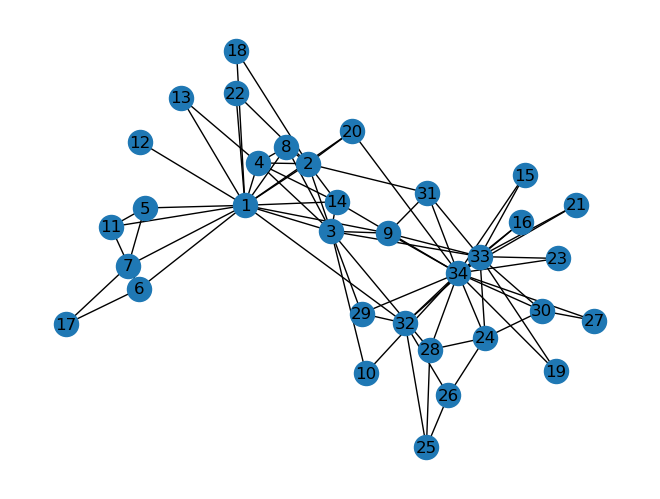

In [106]:
graph_karate = nx.karate_club_graph()
graph_karate = nx.convert_node_labels_to_integers(graph_karate, first_label=1)
nx.draw(graph_karate, with_labels=True)

In [107]:
# degree centrality
degCent = nx.degree_centrality(graph_karate)
degCent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

In [108]:
# sort based on degree centrality
sorted_degcent = {
    k: v for k, v in sorted(degCent.items(), key=lambda item: item[1], reverse=True)
}
sorted_degcent

{34: 0.5151515151515151,
 1: 0.48484848484848486,
 33: 0.36363636363636365,
 3: 0.30303030303030304,
 2: 0.2727272727272727,
 4: 0.18181818181818182,
 32: 0.18181818181818182,
 9: 0.15151515151515152,
 14: 0.15151515151515152,
 24: 0.15151515151515152,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 28: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 5: 0.09090909090909091,
 11: 0.09090909090909091,
 20: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 29: 0.09090909090909091,
 10: 0.06060606060606061,
 13: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 27: 0.06060606060606061,
 12: 0.030303030303030304}

In [109]:
# degree centrality of a node

degCent[34]

0.5151515151515151

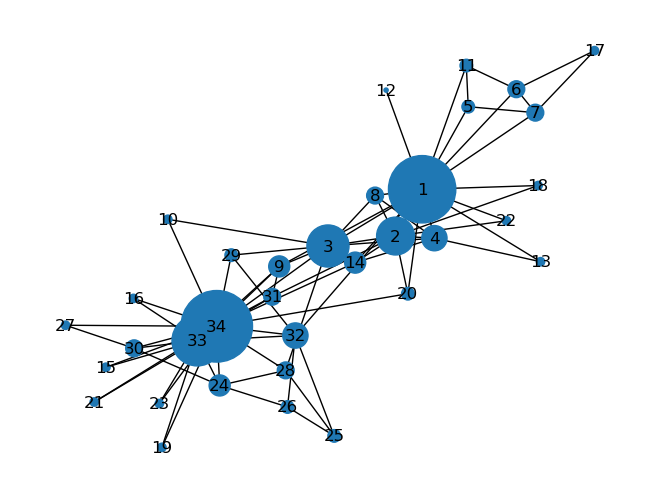

In [110]:
# draw a network with node sizes based on their degree centrality

# create a list of node sizes based on degree centrality
node_sizes = [10000 * v * v for v in degCent.values()]

# draw the graph
nx.draw(
    graph_karate,
    with_labels=True,
    node_size=node_sizes,
    pos=nx.spring_layout(graph_karate),
)

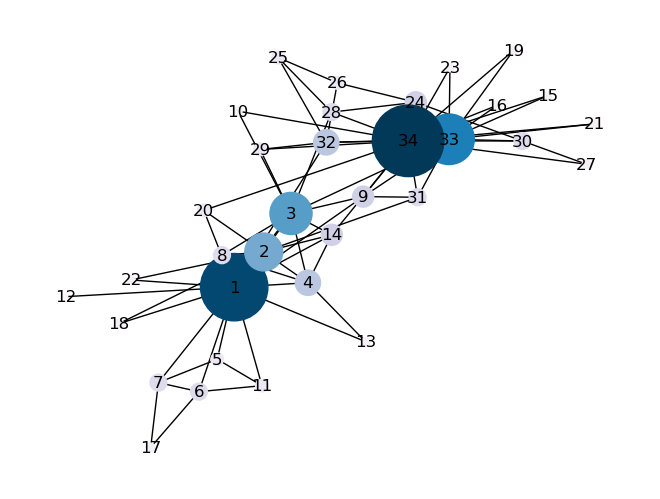

In [111]:
# colors based on degree centrality
node_colors = [v for v in degCent.values()]
# draw the graph
nx.draw(
    graph_karate,
    with_labels=True,
    node_size=node_sizes,
    pos=nx.spring_layout(graph_karate),
    node_color=node_colors,
    cmap=plt.cm.PuBu,
)  # graph_karatereens

# PuBu stands for "Pu" (purple) to "Bu" (blue), and it is a sequential colormap that ranges from light purple to dark blue.

### B) Degree Centrality – Directed Networks


Undirected networks: use degree

Directed networks: use in-degree or out-degree


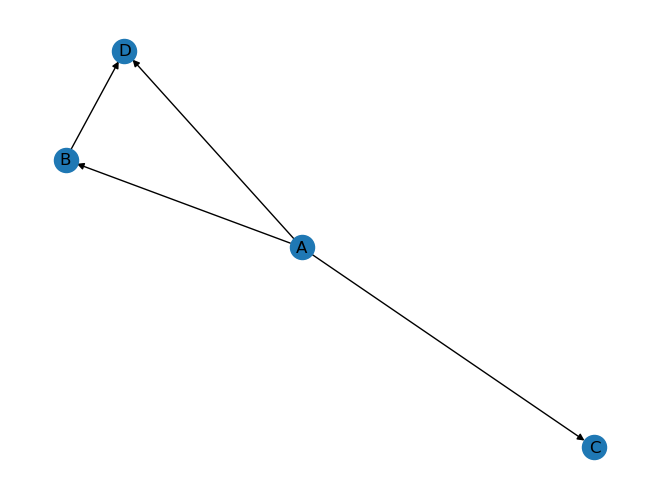

In [112]:
# describe a directed graph gllobally
# directed graph
graph_directed = nx.DiGraph()

graph_directed.add_edge("A", "B")
graph_directed.add_edge("A", "D")
graph_directed.add_edge("A", "C")
graph_directed.add_edge("B", "D")

# draw the nodes with labels
nx.draw(graph_directed, with_labels=True)

In [113]:
# indegree
indegCent = nx.in_degree_centrality(graph_directed)
indegCent

{'A': 0.0,
 'B': 0.3333333333333333,
 'D': 0.6666666666666666,
 'C': 0.3333333333333333}

In [114]:
# out-degree
outdegCent = nx.out_degree_centrality(graph_directed)
outdegCent

{'A': 1.0, 'B': 0.3333333333333333, 'D': 0.0, 'C': 0.0}

In [115]:
# A specific node
outdegCent["A"]

1.0

### C) Closeness Centrality


Closeness centrality is a measure of the average distance of a node to all other nodes in the network. The closeness centrality of a node $i$ can be calculated as:

$$C_C(i) = \frac{1}{\sum\limits_{j \neq i} d_{ij}}$$

where $d_{ij}$ is the shortest path distance between nodes $i$ and $j$. The closeness centrality of a node ranges from 0 to 1, with a higher value indicating a shorter average distance to all other nodes in the network.

The closeness centrality of a node measures how quickly it can spread information or influence throughout the network, as nodes with a shorter average distance to all other nodes can communicate more efficiently. In addition, nodes with a high closeness centrality are often located in the center of the network, and their removal can have a significant impact on the network's connectivity.


In [116]:
# Closness centrality
closeCent = nx.closeness_centrality(graph_directed)
closeCent

{'A': 0.0,
 'B': 0.3333333333333333,
 'D': 0.6666666666666666,
 'C': 0.3333333333333333}

In [117]:
# Another way to compute Closeness Centrality of a node
NodeNumber = 34
(len(graph_karate.nodes()) - 1) / sum(
    nx.shortest_path_length(graph_karate, NodeNumber).values()
)

0.55

### D) Betweenness Centrality


Betweenness centrality is a measure of the extent to which a node lies on the shortest paths between other nodes in the network. The betweenness centrality of a node $i$ can be calculated as:

$$C_B(i) = \sum\limits_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}$$

where $s$ and $t$ are two nodes in the network, $\sigma_{st}$ is the total number of shortest paths between $s$ and $t$, and $\sigma_{st}(i)$ is the number of shortest paths between $s$ and $t$ that pass through node $i$.

The betweenness centrality of a node ranges from 0 to 1, with a higher value indicating a greater number of shortest paths that pass through the node. Nodes with a high betweenness centrality are often located on the "bridges" between different clusters or communities in the network, and their removal can have a significant impact on the network's connectivity.


In [118]:
btwnCent = nx.betweenness_centrality(graph_karate, endpoints=False)
# endpoints = False states that each node dose not included in computation for shortest path numeration
btwnCent

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

In [119]:
sorted_btwnCent = {
    k: v for k, v in sorted(btwnCent.items(), key=lambda item: item[1], reverse=True)
}
sorted_btwnCent

{1: 0.43763528138528146,
 34: 0.30407497594997596,
 33: 0.145247113997114,
 3: 0.14365680615680618,
 32: 0.13827561327561325,
 9: 0.05592682780182781,
 2: 0.053936688311688304,
 14: 0.04586339586339586,
 20: 0.03247504810004811,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 28: 0.02233345358345358,
 24: 0.017613636363636363,
 31: 0.014411976911976909,
 4: 0.011909271284271283,
 26: 0.0038404882154882154,
 30: 0.0029220779220779218,
 25: 0.0022095959595959595,
 29: 0.0017947330447330447,
 10: 0.0008477633477633478,
 5: 0.0006313131313131313,
 11: 0.0006313131313131313,
 8: 0.0,
 12: 0.0,
 13: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 27: 0.0}

betwenness centrality values will
be larger in graphs with many nodes. To control for
this, we divide centrality values by the number of
pairs of nodes in the graph (excluding i)


In [120]:
# comparison betweeness centrality in networks with diffrent number of nodes:
# more nodes => bigger betweeness centrality => useing normalization
btwnCent = nx.betweenness_centrality(
    graph_karate, normalized=True, endpoints=False
)  # defualt = normalize!
btwnCent

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

Computing betweenness centrality of all nodes can be
very computationally expensive.

Approximation: rather than computing
betweenness centrality based on all pairs of nodes s,t ,
we can approximate it based on a sample of nodes.


In [121]:
# betweenness centrality approximation
btwnCent_approx = nx.betweenness_centrality(
    graph_karate, normalized=True, endpoints=False, k=10
)  # number of samples = k
btwnCent_approx

{1: 0.4575138287638286,
 2: 0.08368145743145743,
 3: 0.1283688071188071,
 4: 0.005723905723905724,
 5: 0.0010732323232323232,
 6: 0.0139520202020202,
 7: 0.013952020202020203,
 8: 0.0,
 9: 0.05614027176527176,
 10: 0.0,
 11: 0.0010732323232323232,
 12: 0.0,
 13: 0.0,
 14: 0.036014610389610395,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0320794252044252,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.03616792929292929,
 25: 0.005366161616161615,
 26: 0.00093013468013468,
 27: 0.0,
 28: 0.008657407407407407,
 29: 0.0005366161616161616,
 30: 0.0010732323232323232,
 31: 0.023565115440115438,
 32: 0.15291005291005288,
 33: 0.1458471620971621,
 34: 0.32150974025974033}

In [122]:
sorted_btwnCent = {
    k: v
    for k, v in sorted(btwnCent_approx.items(), key=lambda item: item[1], reverse=True)
}
sorted_btwnCent

{1: 0.4575138287638286,
 34: 0.32150974025974033,
 32: 0.15291005291005288,
 33: 0.1458471620971621,
 3: 0.1283688071188071,
 2: 0.08368145743145743,
 9: 0.05614027176527176,
 24: 0.03616792929292929,
 14: 0.036014610389610395,
 20: 0.0320794252044252,
 31: 0.023565115440115438,
 7: 0.013952020202020203,
 6: 0.0139520202020202,
 28: 0.008657407407407407,
 4: 0.005723905723905724,
 25: 0.005366161616161615,
 5: 0.0010732323232323232,
 11: 0.0010732323232323232,
 30: 0.0010732323232323232,
 26: 0.00093013468013468,
 29: 0.0005366161616161616,
 8: 0.0,
 10: 0.0,
 12: 0.0,
 13: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 27: 0.0}

#### Betweenness Centrality – Subsets


In [123]:
btwnCent_subset = nx.betweenness_centrality_subset(
    graph_karate,
    [34, 21, 30, 16, 27, 15, 23, 10],
    [1, 4, 13, 11, 6, 12, 17, 7],
    normalized=True,
)
btwnCent_subset

{1: 0.04355008417508417,
 2: 0.0,
 3: 0.01505381192881193,
 4: 0.0019044612794612795,
 5: 0.0,
 6: 0.003787878787878788,
 7: 0.003787878787878788,
 8: 0.0,
 9: 0.012388768638768638,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.012970478595478596,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.007804232804232804,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.012388768638768638,
 33: 0.01664712602212602,
 34: 0.028807419432419434}

### E) Betweenness Centrality – Edges


Betweenness centrality for edges is a measure of the extent to which an edge lies on the shortest paths between other edges in the network. The betweenness centrality of an edge $e$ can be calculated as:

$$C_B(e) = \sum_{s \neq e \neq t} \frac{\sigma_{st}(e)}{\sigma_{st}}$$

where $s$ and $t$ are two nodes in the network, $\sigma_{st}$ is the total number of shortest paths between $s$ and $t$, and $\sigma_{st}(e)$ is the number of shortest paths between $s$ and $t$ that pass through edge $e$.

The betweenness centrality of an edge ranges from 0 to 1, with a higher value indicating a greater number of shortest paths that pass through the edge. Edges with a high betweenness centrality are often located on the "bridges" between different clusters or communities in the network, and their removal can have a significant impact on the network's connectivity.


In [124]:
btwnCent_edge = nx.edge_betweenness_centrality(graph_karate, normalized=True)
btwnCent_edge

{(1, 2): 0.025252525252525245,
 (1, 3): 0.0777876807288572,
 (1, 4): 0.02049910873440285,
 (1, 5): 0.0522875816993464,
 (1, 6): 0.07813428401663694,
 (1, 7): 0.07813428401663695,
 (1, 8): 0.0228206434088787,
 (1, 9): 0.07423959482783014,
 (1, 11): 0.0522875816993464,
 (1, 12): 0.058823529411764705,
 (1, 13): 0.04652406417112298,
 (1, 14): 0.04237189825425121,
 (1, 18): 0.04012392835922248,
 (1, 20): 0.045936960642843,
 (1, 22): 0.040123928359222474,
 (1, 32): 0.1272599949070537,
 (2, 3): 0.023232323232323233,
 (2, 4): 0.0077243018419489,
 (2, 8): 0.007422969187675069,
 (2, 14): 0.01240556828792123,
 (2, 18): 0.01869960105254222,
 (2, 20): 0.014633732280791102,
 (2, 22): 0.01869960105254222,
 (2, 31): 0.032280791104320514,
 (3, 4): 0.022430184194890075,
 (3, 8): 0.025214328155504617,
 (3, 9): 0.009175791528732704,
 (3, 10): 0.030803836686189627,
 (3, 14): 0.007630931160342923,
 (3, 28): 0.04119203236850296,
 (3, 29): 0.02278244631185807,
 (3, 33): 0.06898678663384543,
 (4, 8): 0.0033655

### G) Eigenvalue Centrality


Eigenvalue centrality is a measure of the importance of a node in a network based on the importance of its neighbors. The eigenvalue centrality of a node $i$ can be calculated as the principal eigenvector of the adjacency matrix $\mathbf{A}$ of the network:

$$\mathbf{Av} = \lambda \mathbf{v}$$

where $\mathbf{v}$ is the eigenvector corresponding to the largest eigenvalue $\lambda$. The eigenvalue centrality of node $i$ is then given by the $i$-th element of $\mathbf{v}$.

The eigenvalue centrality of a node ranges from 0 to 1, with a higher value indicating a greater importance of the node and its neighbors in the network. Nodes with a high eigenvalue centrality are often located in the center of the network and are well-connected to other highly connected nodes, and their removal can have a significant impact on the network's connectivity.


In [125]:
# Compute the adjacency matrix of the network
A = nx.adjacency_matrix(graph_karate)

# Compute the principal eigenvector of the adjacency matrix
eigenvector_centrality = nx.eigenvector_centrality_numpy(graph_karate)
eigenvector_centrality

{1: 0.3554914445245666,
 2: 0.2659599195524917,
 3: 0.3171925044864317,
 4: 0.21117972037789046,
 5: 0.07596881818306869,
 6: 0.07948304511709926,
 7: 0.07948304511709926,
 8: 0.17095974804479655,
 9: 0.22740390712540018,
 10: 0.1026742507235863,
 11: 0.07596881818306875,
 12: 0.05285569749352127,
 13: 0.08425462871671377,
 14: 0.22647272014248135,
 15: 0.10140326218952456,
 16: 0.10140326218952456,
 17: 0.02363562810459123,
 18: 0.09239953819570257,
 19: 0.10140326218952456,
 20: 0.14791251029338737,
 21: 0.10140326218952452,
 22: 0.09239953819570255,
 23: 0.10140326218952454,
 24: 0.1501185718611527,
 25: 0.057052440541165546,
 26: 0.05920647491677841,
 27: 0.07557941348827209,
 28: 0.13347715338024016,
 29: 0.1310778229837107,
 30: 0.13496081926232775,
 31: 0.17475830231435288,
 32: 0.19103384140654373,
 33: 0.30864421979104706,
 34: 0.3733634702914831}

In [126]:
sorted_EigenCent = {
    k: v
    for k, v in sorted(
        eigenvector_centrality.items(), key=lambda item: item[1], reverse=True
    )
}
sorted_EigenCent

{34: 0.3733634702914831,
 1: 0.3554914445245666,
 3: 0.3171925044864317,
 33: 0.30864421979104706,
 2: 0.2659599195524917,
 9: 0.22740390712540018,
 14: 0.22647272014248135,
 4: 0.21117972037789046,
 32: 0.19103384140654373,
 31: 0.17475830231435288,
 8: 0.17095974804479655,
 24: 0.1501185718611527,
 20: 0.14791251029338737,
 30: 0.13496081926232775,
 28: 0.13347715338024016,
 29: 0.1310778229837107,
 10: 0.1026742507235863,
 15: 0.10140326218952456,
 16: 0.10140326218952456,
 19: 0.10140326218952456,
 23: 0.10140326218952454,
 21: 0.10140326218952452,
 18: 0.09239953819570257,
 22: 0.09239953819570255,
 13: 0.08425462871671377,
 6: 0.07948304511709926,
 7: 0.07948304511709926,
 11: 0.07596881818306875,
 5: 0.07596881818306869,
 27: 0.07557941348827209,
 26: 0.05920647491677841,
 25: 0.057052440541165546,
 12: 0.05285569749352127,
 17: 0.02363562810459123}